<a href="https://colab.research.google.com/github/rishabhkamal0/project-work/blob/main/hld%20and%20lld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High-Level Design (HLD)
HLD focuses on the overall architecture, system components, their interactions, and how they will work together.

Overview
Frontend: React-based UI where users can upload files, view file summary, and interact with the backend.
Backend: FastAPI server responsible for handling file uploads, summarizing the file, and providing responses to the frontend.
File Storage: Temporary in-memory file storage for the uploaded files. In production, you might replace it with a more robust solution like cloud storage (AWS S3, Google Cloud Storage) or a local file system.
System Components
Frontend (React):

FileUpload Component: Allows the user to upload files and submit a query for summarization.
Result Component: Displays the summary of the uploaded file after processing.
App Component: Contains routing and manages the overall state.
Backend (FastAPI):

File Upload Endpoint: Handles file uploads from the frontend and stores them temporarily.
File Summarization Endpoint: Accepts the filename, processes the file, and returns a summary (mocked or real).
Database/Storage:

Store uploaded files (in memory for simplicity) and make them available for summarization.
Communication:

React communicates with FastAPI via HTTP requests (using axios for React, and FastAPI routes for backend).
High-Level Design Diagram
plaintext
Copy code

Frontend:

React app makes requests to the FastAPI server for file upload and summary retrieval.
Displays the result of the file processing.
Backend:

FastAPI handles file uploads and returns summarized content based on the uploaded files.
Responds with success/failure messages and the actual summary of the content.
Low-Level Design (LLD)
LLD dives into specific details of the implementation: APIs, data models, methods, error handling, and individual components.

Frontend (React)
FileUpload Component:

Handles file input and file upload process.
State variables: file (holds the file object), summary (holds the summary of the file).
Methods:
handleFileChange(): Set the selected file.
handleUpload(): Handles the upload logic and makes a POST request to the backend.
handleSummarize(): Sends a GET request to the backend to get the file summary.
Sample Code:



export default FileUpload;
Backend (FastAPI):

File Upload Endpoint (/upload/):
Accepts multipart/form-data for file uploads.
Stores the file in memory or a temporary storage for further processing.
Sample Code:

python
Copy code
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse

Summarization Endpoint (/summarize/):
Accepts a filename and returns a summary of the uploaded file. (You can integrate NLP or custom logic to generate actual summaries.)
Data Models:
For simplicity, we’re storing files as raw bytes in memory (i.e., uploaded_files dictionary), but for a production system:

Database: Store file metadata (filename, upload timestamp, etc.) in a relational or NoSQL database.
File Storage: Cloud services like AWS S3 for storing files would be beneficial.
Error Handling:
File Upload:
Handle cases where no file is uploaded or file type is invalid.
Provide appropriate responses (success/failure).
File Summarization:
Handle cases where the file does not exist in memory.
Return a meaningful error message if the file is not found or the summarization fails.
Summary of HLD and LLD
HLD:

Clear division between frontend and backend with communication over HTTP.
React handles UI and interacts with FastAPI for file uploading and summarization.
FastAPI handles business logic and file processing.
LLD:

Frontend: React components for file selection, upload, and displaying the summary.
Backend: FastAPI handles file upload, temporary storage, and summarization logic.
Proper error handling and validation for both frontend and backend.
Scaling Considerations:
Frontend: Can be extended with features like user authentication, more sophisticated UI/UX.
Backend: If scaling, you can switch to persistent storage (e.g., AWS S3), implement queuing for file processing, or even integrate more complex NLP models for file summarization.

In [ ]:
import React, { useState } from 'react';
import axios from 'axios';

const FileUpload = () => {
  const [file, setFile] = useState(null);
  const [summary, setSummary] = useState('');

  const handleFileChange = (e) => {
    setFile(e.target.files[0]);
  };

  const handleUpload = async () => {
    if (!file) {
      alert("Please select a file.");
      return;
    }
    const formData = new FormData();
    formData.append("file", file);

    try {
      const response = await axios.post('http://localhost:8000/upload/', formData, {
        headers: { 'Content-Type': 'multipart/form-data' }
      });
      alert(`File uploaded: ${response.data.filename}`);
    } catch (error) {
      console.error(error);
      alert("File upload failed.");
    }
  };

  const handleSummarize = async () => {
    if (!file) {
      alert("Please upload a file first!");
      return;
    }

    try {
      const response = await axios.get('http://localhost:8000/summarize/', {
        params: { filename: file.name }
      });
      setSummary(response.data.summary);
    } catch (error) {
      console.error(error);
      alert("Error retrieving file summary.");
    }
  };

  return (
    <div>
      <input type="file" onChange={handleFileChange} />
      <button onClick={handleUpload}>Upload File</button>
      <button onClick={handleSummarize}>Get Summary</button>
      {summary && <p>{summary}</p>}
    </div>
  );
};

export default FileUpload;


In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse

app = FastAPI()

uploaded_files = {}

@app.post("/upload/")
async def upload_file(file: UploadFile = File(...)):
    content = await file.read()
    uploaded_files[file.filename] = content
    return {"filename": file.filename, "message": "File uploaded successfully!"}

@app.get("/summarize/")
async def summarize_file(filename: str):
    if filename not in uploaded_files:
        raise HTTPException(status_code=404, detail="File not found")

    content = uploaded_files[filename]
    # You can use NLP or any processing logic here
    summary = f"Summary of {filename}: {len(content)} bytes"
    return {"summary": summary}


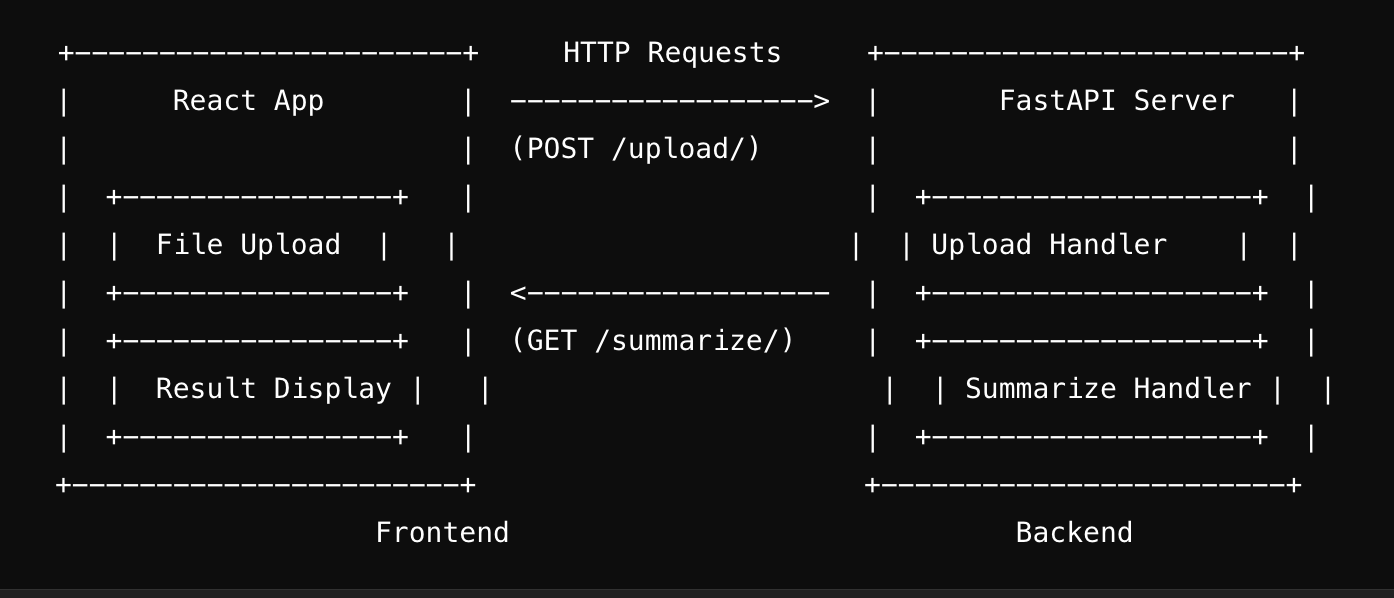